In [0]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [0]:
data_df = pd.read_csv('/content/musk.csv')

In [3]:
data_df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


In [4]:
data_df.shape

(6598, 170)

In [5]:
data_df.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
                      ...  
f163                  int64
f164                  int64
f165                  int64
f166                  int64
class                 int64
Length: 170, dtype: object

In [6]:
data_df.pop('molecule_name')

0            MUSK-211
1            MUSK-211
2            MUSK-211
3            MUSK-211
4            MUSK-211
            ...      
6593    NON-MUSK-jp13
6594    NON-MUSK-jp13
6595    NON-MUSK-jp13
6596    NON-MUSK-jp13
6597    NON-MUSK-jp13
Name: molecule_name, Length: 6598, dtype: object

In [7]:
data_df.pop('ID')

0          1
1          2
2          3
3          4
4          5
        ... 
6593    6594
6594    6595
6595    6596
6596    6597
6597    6598
Name: ID, Length: 6598, dtype: int64

In [8]:
data_df.pop('conformation_name')

0        211_1+1
1       211_1+10
2       211_1+11
3       211_1+12
4       211_1+13
          ...   
6593    jp13_2+5
6594    jp13_2+6
6595    jp13_2+7
6596    jp13_2+8
6597    jp13_2+9
Name: conformation_name, Length: 6598, dtype: object

In [9]:
data_df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,51,-123,-23,-108,-117,134,-160,82,-230,-28,-150,-63,-55,-77,-108,-308,-221,-41,-57,12,-112,-183,-198,-35,137,-198,-168,-153,-51,252,-108,135,-121,119,-120,73,28,-153,-20,-130,...,224,-18,-96,43,1,-76,-53,-38,-23,-176,-32,-205,-95,-124,-139,-153,-170,-178,-102,-113,-42,-67,-141,-96,-112,-113,-47,124,-12,62,-66,164,-14,-29,107,171,-44,-115,118,0
6594,44,-104,-19,-105,-117,142,-165,68,-225,-32,-124,-77,-43,-74,-100,-291,-215,-25,-49,6,-121,-183,-201,-54,127,-204,-164,-160,-41,255,-117,-104,-14,133,-157,141,46,-153,-26,-127,...,232,-6,-146,-88,-75,-74,-55,-30,-28,-175,-48,-202,-86,-125,-138,-154,-169,-178,-102,-123,-32,-52,-136,-98,-109,-112,-56,-49,-85,60,-51,166,-9,150,129,158,-66,-144,-5,0
6595,44,-102,-19,-104,-117,72,-165,65,-219,-12,-107,-66,-58,-82,-77,-288,-214,-21,-58,-32,-93,-183,-197,-71,218,-217,-164,-161,-59,243,-117,-103,-14,118,-157,140,-150,-153,-27,-127,...,167,-13,-188,-89,-117,-57,-47,-33,-28,-175,-50,-216,-129,-130,-138,-155,-169,-178,-102,-124,-32,-51,-136,-98,-123,-112,-55,-47,-84,-226,90,117,-8,150,130,159,-66,-144,-6,0
6596,51,-121,-23,-106,-117,63,-161,79,-224,-30,-129,-54,-60,-86,-88,-307,-221,-39,-58,-12,-86,-184,-180,-61,221,-211,-168,-154,-63,243,-107,136,-121,116,-122,73,-155,-153,-21,-130,...,167,7,-170,43,-6,-61,-47,-43,-23,-176,-33,-212,-131,-113,-139,-153,-170,-178,-103,-114,-42,-66,-141,-96,-123,-113,-46,124,-11,-238,86,99,-14,-31,106,171,-44,-116,117,0


In [0]:
df=data_df

In [0]:
X=df.drop('class', axis=1)

In [0]:
y=df['class']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model=LogisticRegression(max_iter=5000)

In [17]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred=model.predict(X_test)

In [19]:
model.score(X_test, y_test)

0.9484848484848485

In [0]:
from sklearn.metrics import mean_squared_error

In [21]:
1-mean_squared_error(y_test, y_pred)

0.9484848484848485

In [22]:
!pip3 install -U tensorflow==2.0 --quiet
import tensorflow as tf


     |████████████████████████████████| 86.3MB 114kB/s 
     |████████████████████████████████| 450kB 51.0MB/s 
     |████████████████████████████████| 3.8MB 40.9MB/s 


In [0]:
import tensorflow as tf

In [0]:
col=X_train.shape[1]

In [43]:
X_train.shape

(5278, 166)

In [0]:
m=tf.keras.models.Sequential()

In [0]:
m.add(tf.keras.layers.Dense(300,input_shape=(166,)))

In [0]:
m.add(tf.keras.layers.BatchNormalization())

In [0]:
m.add(tf.keras.layers.Dense(200, activation='relu'))

In [0]:
m.add(tf.keras.layers.Dense(100, activation='relu'))

In [0]:
m.add(tf.keras.layers.Dense(30, activation='relu'))

In [0]:
m.add(tf.keras.layers.Dense(2, activation='softmax'))

In [0]:
m.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [53]:
m.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               50100     
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_13 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 30)                3030      
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 62        
Total params: 134,692
Trainable params: 134,092
Non-trainable params: 600
______________________________________________

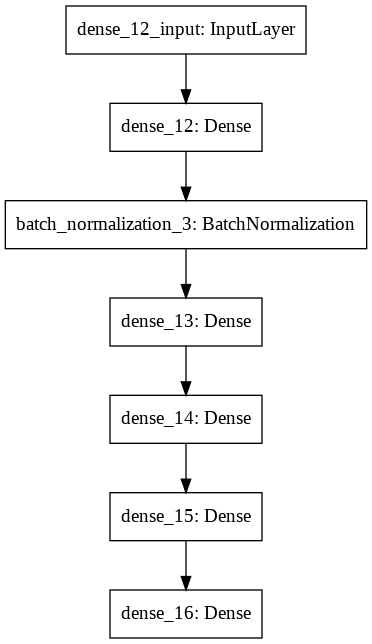

In [55]:
from tensorflow.keras.utils import plot_model
plot_model(m, to_file='model.png')

In [0]:
y_train=tf.keras.utils.to_categorical(y_train)
y_test=tf.keras.utils.to_categorical(y_test)

In [0]:
m = tf.keras.models.load_model('Rohit.h5')

Train on 5278 samples, validate on 1320 samples
Epoch 1/100
5278/5278 [==============================] - 1s 137us/sample - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 2/100
5278/5278 [==============================] - 1s 109us/sample - loss: 0.0079 - accuracy: 0.9968 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 3/100
5278/5278 [==============================] - 1s 106us/sample - loss: 0.0049 - accuracy: 0.9981 - val_loss: 0.0048 - val_accuracy: 0.9977
Epoch 4/100
5278/5278 [==============================] - 1s 107us/sample - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/100
5278/5278 [==============================] - 1s 107us/sample - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 6/100
5278/5278 [==============================] - 1s 109us/sample - loss: 0.0038 - accuracy: 0.9985 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/100
5278/5278 [==============================] - 1

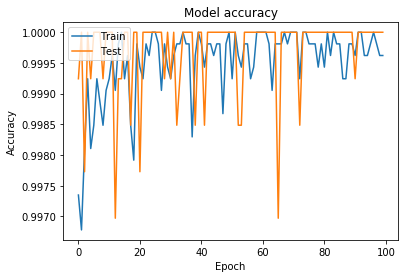

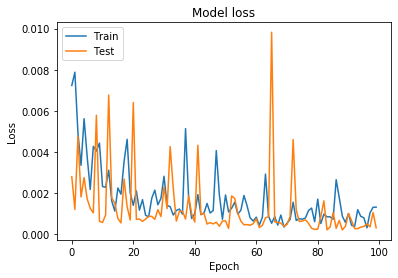

In [28]:
import matplotlib.pyplot as plt

history = m.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=100,
          batch_size=32)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [59]:
m.evaluate(X_test, y_test)

1320/1320 [==============================] - 0s 55us/sample - loss: 0.0104 - accuracy: 0.9962


[0.010382538491103332, 0.9962121]

In [83]:
pred=m.predict_classes(X_test)

In [84]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [85]:
confusion_matrix(y_test, pred)

array([[1105,    0],
       [   1,  214]])

In [87]:
f1_score(y_test, pred)

0.9976689976689977

In [88]:
print(precision_score(y_test, pred))
print(recall_score(y_test, pred))

1.0
0.9953488372093023


In [0]:
m.save('Rohit.h5')

In [0]:
from google.colab import files

files.download('Rohit.h5')